# PCA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

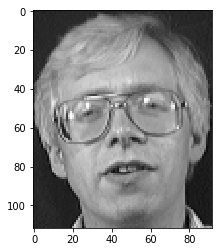

In [3]:
data = loadmat('faces112x92.mat')

faces = data['faces']
target = data['target']

ny,nx = 112,92

plt.imshow(faces[1,:].reshape(ny,nx),interpolation='nearest',cmap='gray')
plt.show()

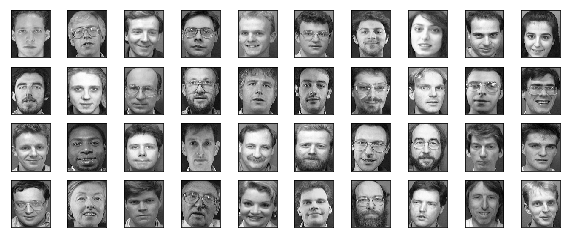

someone


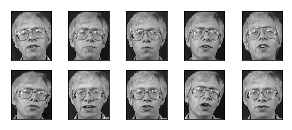

Average of one person


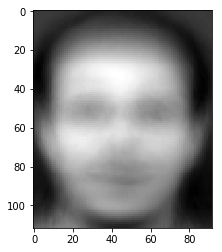

Average of all images


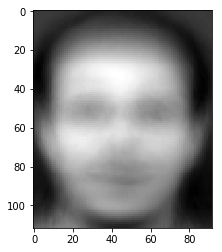

In [9]:
plt.figure(figsize=(10, 4))
for i in range(40):
	plt.subplot(4, 10, i + 1), plt.xticks([]), plt.yticks([])
	plt.imshow(faces[i, :].reshape(ny, nx), interpolation='nearest', cmap='gray')
plt.show()

print('someone')
plt.figure(figsize=(5, 2))
someone = []
j = 0
for i in np.arange(0, 400, 40):
	someone.append(faces[j + 1, :])
	plt.subplot(2, 5, j + 1), plt.xticks([]), plt.yticks([])
	plt.imshow(faces[i + 1, :].reshape(ny, nx), interpolation='nearest', cmap='gray')
	j = j + 1
plt.show()

print('Average of one person')
mb, nb = np.shape(someone)
ava_someone = np.sum(faces / mb, axis=0)
plt.imshow(ava_someone.reshape(ny, nx), interpolation='nearest', cmap='gray')
plt.show()

print('Average of all images')
m, n = np.shape(faces)
ava_faces = np.sum(faces / m, axis=0)
plt.imshow(ava_faces.reshape(ny, nx), interpolation='nearest', cmap='gray')
plt.show()


# PCA 

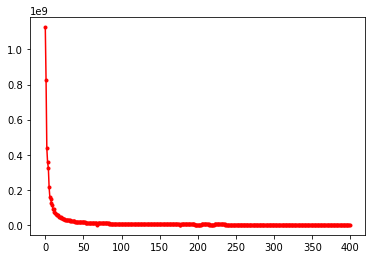

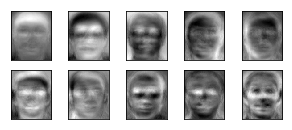

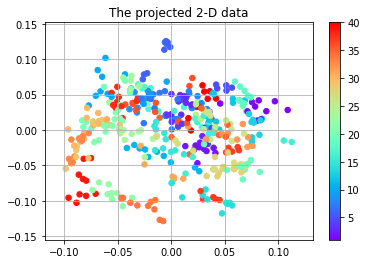

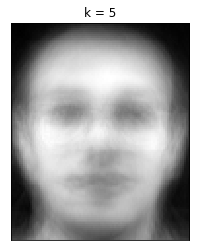

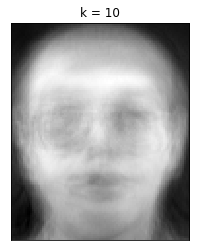

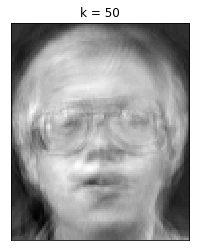

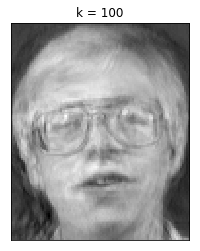

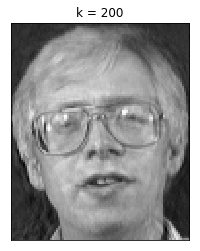

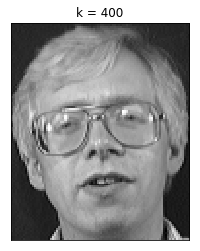

In [12]:
m, n = np.shape(faces)
######################################################
def PCA(x, k):
	m, n = np.shape(x)
	ava_x = np.sum(x / m, axis=0)
	x = x - ava_x
	C = np.dot(x, x.T)
	evls, U = np.linalg.eig(C)
	sorted = np.argsort(evls)[::-1]
	U = U[:, sorted[:k]]
	new_U = np.dot(x.T, U)
	new_U = new_U / np.sum(new_U ** 2, axis=0)
	Z = np.dot(x, new_U)
	return new_U, Z, evls


#######################################################
new_U, Z, evls = PCA(faces, 10)

plt.plot(evls,'.-r')
plt.show()
plt.figure(figsize=(5, 2))
for i in np.arange(10):
	plt.subplot(2, 5, i + 1), plt.xticks([]), plt.yticks([])
	plt.imshow(new_U.T[i, :].reshape(ny, nx), interpolation='nearest', cmap='gray')
plt.show()
# #
plt.title("The projected 2-D data")
plt.scatter(Z[:, 0], Z[:, 1], 30, target.flatten(), cmap=plt.cm.rainbow)
plt.colorbar()
plt.grid()
plt.show()


for i in [5, 10, 50, 100, 200,400]:
 new_U, Z, evls = PCA(faces, i)

 new_U = new_U / np.sum(new_U ** 2, axis=0)

 img_U = np.dot(new_U, Z[1, :]) + np.sum(faces / m, axis=0)
 plt.title('k = %s'%i), plt.xticks([]), plt.yticks([])
 plt.imshow(img_U.reshape(ny, nx), interpolation='nearest', cmap='gray')

 plt.show()
